In [ ]:
Varying the Classification Threshold in Logistic Regression

In [2]:
import pandas as pd

data_web_address = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
column_names = ['pregnancy_x', 
                'plasma_con', 
                'blood_pressure', 
                'skin_mm', 
                'insulin', 
                'bmi', 
                'pedigree_func', 
                'age', 
                'target']

feature_names = column_names[:-1]
all_data = pd.read_csv(data_web_address , names=column_names)
all_data.head()

import numpy as np
import pandas as pd

X = all_data[feature_names]
y = all_data['target']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7,stratify=y)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)
y_pred_proba[:,1]

array([ 0.12889691,  0.16003644,  0.18178279,  0.26026536,  0.19607966,
        0.02338669,  0.08582239,  0.30904432,  0.15262031,  0.57532607,
        0.19472344,  0.5450249 ,  0.23953703,  0.21645245,  0.73382002,
        0.07114854,  0.51769085,  0.2356799 ,  0.27156478,  0.02816506,
        0.61623785,  0.62138952,  0.3009406 ,  0.36140993,  0.73721107,
        0.31120458,  0.30127869,  0.0954719 ,  0.17749031,  0.79241579,
        0.75739679,  0.61102916,  0.18528432,  0.37891817,  0.67945718,
        0.13008356,  0.17348681,  0.73142099,  0.33608869,  0.40166906,
        0.32009276,  0.14870895,  0.19908409,  0.1071584 ,  0.13930614,
        0.26917935,  0.29865454,  0.47265401,  0.12057594,  0.17689581,
        0.39158457,  0.60246347,  0.27264813,  0.29989028,  0.19662222,
        0.11252416,  0.63628396,  0.10735606,  0.22441409,  0.21347092,
        0.57073661,  0.21725055,  0.38204364,  0.06794924,  0.13091798,
        0.32752847,  0.35339273,  0.67631321,  0.24438181,  0.57

In [3]:
from sklearn.metrics import roc_curve

fpr, tpr, ths = roc_curve(y_test, y_pred_proba[:,1])

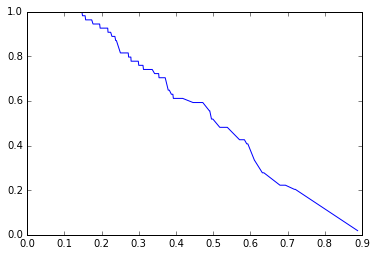

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(ths,tpr)

In [9]:
from sklearn.preprocessing import binarize
from sklearn.metrics import confusion_matrix
y_pred_th= binarize(y_pred_proba, threshold=0.1)
confusion_matrix(y_test, y_pred_th[:,1],labels=[1,0])

array([[54,  0],
       [81, 19]], dtype=int64)

In [10]:
y_pred_th = binarize(y_pred_proba, threshold=0.146)
confusion_matrix(y_test, y_pred_th[:,1],labels=[1,0])

array([[54,  0],
       [67, 33]], dtype=int64)